# Introduction

## Philosophy of the course
Numerous scientific problems can only be addressed through modeling and computer analysis. This stems from the fact that a lot of these problems are complex and the corresponding models cannot be solved using only pen-and-paper. 

Many models appearing in engineering or physical applications are mathematically described by partial differential equations (PDE) and the aim of this course is to provide a practical introduction to the relevant tools to solve them. By practical we mean that we will not develop the theory behind PDEs and also avoid complex mathematical derivations of the numerical methods we describe below. Although these are beautiful subjects, they are often characterized by a steep learning curve and our objective is to get our hands on solving real problems as quickly as possible. In some places we nevertheless provide some mathematical background about the techniques we describe because they cannot be properly understood otherwise. In each case, we try to keep things simple and written in such a way that the corresponding section may be skipped at first reading.

## Outline
To be written

## Python and why python

All the pieces of code written in this course are written in Python. However, we try to make the required prior knowledge of Python as little as possible and the reader is only expected to have a basic knowledge of any programming language and be familiar with concepts like variables, loops, conditional statements, functions etc.

# Approximations and Taylor expansion

In general, the resolution of numerical problems require some approximations.

The first one is related to the fact that most real numbers need an infinite numbers of digits after the decimal point to be properly represented. To store these numbers in the memory of a computer one therefore needs to cut their representation at some point beyond the decimal point. The number of digits kept is called the precision of the representation. For example, in *single precision* and *double precision*, $\pi$ is given by the following approximations:

\begin{align}
\pi &= 3.1415927 \quad\quad &\text{(single precision)}\\
\pi &= 3.141592653589793 \quad\quad &\text{(double precision)}\\
\end{align}

In this course, we always use double precision for real numbers as this is the default precision used by Python. Such a precision is large enough for the kind of numerical problems we consider, but the reader should still be aware that rounding off errors can cause some difficulties as they can get amplified when certain operations are performed or when some iterative procedures are used. Two good references to get started on the subject are:

- https://docs.python.org/3/tutorial/floatingpoint.html
- https://floating-point-gui.de

In the context of the numerical discretisation of ordinary or partial diffential equations, the more significant limitation in precision usually comes from the limited computer resources available to solve a problem or the time needed to get the solution. Indeed, from the physical point of view, both time and space are continuous variables...

## Taylor's theorem

In order to estimate the accuracy of discretized differential operators or time integration schemes, Taylor's theorem provides a valuable tool. Let $x$ be any point in the interval $[a\ b]$ and $\Delta x$ a small positive real number. Schematically we have:

<img src="figures/taylor.png">

Any *well behaved* function in $[a\ b]$ can then be approximated using the following expression (Taylor's expansion) $\cite{Arfken}$:

\begin{align}
f(x+\Delta x)=f(x)+f'(x)\Delta x+\frac{f''(x)}{2!}\Delta x^2+\dots + \frac{f^{(k)}(x)}{k!}\Delta x^k + R_{k+1}
\label{eq:taylorExpansion}
\end{align}

with,

\begin{align}
R_{k+1} = \frac{f^{k+1}(\xi)}{(k+1)!}\Delta x^{k+1}, \quad\quad x\leq \xi \leq x+\Delta x
\end{align}

In the above formula, $f^{(k)}$ denotes the $k$-th derivative of $f$. Note that at this stage, no approximations have been made. Assuming that $\vert f^{(k)}\vert$ is bounded by a constant $C$ in $[a\ b]$, we can then write:

\begin{align}
\vert R_{k+1}\vert \leq \frac{C}{(k+1)!}\Delta x^{k+1}\label{eq:remainder}
\end{align}

Equation $\ref{eq:remainder}$ gives a bound on the error made by dropping terms beyond $\frac{f^{(k)}(x)}{k!}\Delta x^k$ in $\ref{eq:taylorExpansion}$. One can then write $R_{k+1}$ using the so-called big O notation:

\begin{align}
R_{k+1} = O(\Delta x^{k+1})
\end{align}

The above notation means that $\vert R_{k+1}\vert$ goes to $0$ at least as fast as $\Delta x^{k+1}$ for $\Delta x \rightarrow 0$. We then say that the approximation,

\begin{align}
f(x+\Delta x)\approx f(x)+f'(x)\Delta x+\frac{f''(x)}{2!}\Delta x^2+\dots + \frac{f^{(k)}(x)}{k!}\Delta x^k
\end{align}

is of order $k+1$. Importantly, this implies that the remainder is at least reduced by a factor of $2^{k+1}$ if $\Delta x$ is divided by $2$. This is a very important concept that will be discussed numerous times in this course.

## Expansion of $e^x$

To make things more concrete and to write our first python code of the course, let us consider the Taylor expansion of the exponential function $e^x$ around $x=0$. According to \ref{eq:taylorExpansion}, one has:

\begin{align}
e^{\Delta x} = 1 + \Delta x + \frac{(\Delta x)^2}{2} + R_3,\quad\quad R_3=e^{\xi} \frac{(\Delta x)^3}{3!},\label{eq:residual} \quad\quad 0\leq \xi \leq \Delta x.
\end{align}

As $e^x$ is monotonously inscreasing, we certainly can bound $e^{\xi}$ by $e$ when $\Delta x \rightarrow 0$. Therefore, $\vert R_3 \vert \leq e \frac{(\Delta x)^3}{3!} = O(\Delta x)^3$. Let's check using python that this is indeed the case.

First of all, we need to *import* some Python packages into our code. One Python file can access the containings of another by *importing* it. Packages we are interested in at this stage are: 

* ``NumPy``

    > [NumPy][1] is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.
    
* ``Matplotlib``
    > [Matplotlib][2] is a comprehensive library for creating static, animated, and interactive visualizations in Python.

[1]: <https://numpy.org/doc/stable/user/whatisnumpy.html> "Why NumPy?"
[2]: <https://matplotlib.org> "Matplotlib"

These 2 packages form the basis of scientific computations in Python. *NumPy* provides tools to solve huge variety of different mathematical problems, and *Matplotlib* provides tools to visualize any kind of numerical data.

Imports in Python are performed using `import` statement:

In [2]:
import numpy

In order to access then the tools of module (unit of Python code), we put the name of this module in front of the name of the necessary object:

In [3]:
print(numpy.pi)

3.141592653589793


Other option is to create the **shortcut** for the module name using `as` keyword:

In [4]:
import numpy as np

print(np.pi)

3.141592653589793


In some cases it will even make more sense to import **only** the object you require from module:

In [5]:
from numpy import cos

Imports are usually performed on top of the Python file before any other code.

In order to create comment in Python (text in your code which will be ignored by Python), put `#` in front of the text.

In [6]:
# Note that numpy has already been imported above.
# Here it is imported repetedly for the sake of
# demonstration what your code should look like.
#
# matplotlib.pyplot provides all the tools which
# are usually necessary for 2D plotting.

import numpy as np
import matplotlib.pyplot as plt

As we are working in *Jupyter*, we will take advantage of so-called **magic commands**. They are crazily helpful in some cases, but note that they are *specific to IPython and Jupyter* (IPython and Jupyter are projects offering interactive shell for Python programming).

What magic command does? It basically creates an *alias* to some command.

Magic commands have `%` in front. We use

In [7]:
%matplotlib inline

So that whatever we plot will appear *inline* - in our notebook, right below the code which produced graphical output.

We then set the style of our plots, which will be universal througout the whole course. Matplotlib has several predefines styles encoded in files. You, of course, can always create your own style.

In [8]:
plt.style.use('./mainstyle.use')

Let us now create the first mathematical object that will represent the error term $R_3$ of the approximation of the exponential function (see \ref{eq:residual}).

When we want to define certain quantity at the set of points, we might use *either* built-in *Python* sequences (list, tuple, range etc.) *or* 1D *NumPy* arrays. What to choose? In many cases yor choice will not affect the result, **but** usually *NumPy* array is better because of the following [reasons][3]:
* *Memory*

    They occupy less space.


* *Performance*

    They are faster.


* *Functionality*

    They support **way more** mathematical operations.


[3]: <https://webcourses.ucf.edu/courses/1249560/pages/python-lists-vs-numpy-arrays-what-is-the-difference> "Lists vs NumPy arrays"

Keep in mind, though, that you will encounter situations when it will be more convenient for you to create a list first and then transform it into *NumPy* array.

In [9]:
delta_list = [2**(-k) for k in range(1, 10)]

delta = np.asarray(delta_list)
print(delta)

[0.5        0.25       0.125      0.0625     0.03125    0.015625
 0.0078125  0.00390625 0.00195312]


In [10]:
R3 = np.exp(delta) - (1 + delta + delta**2 / 2)
slope = delta**3

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


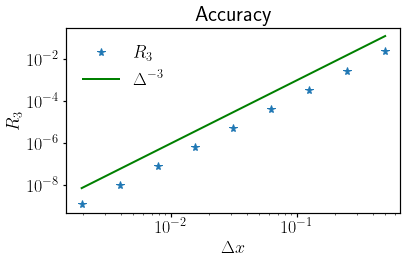

In [11]:
fig, ax = plt.subplots()
ax.loglog(delta, R3, '*', label=r'$R_3$')
ax.loglog(delta, slope, color='green', label=r'$\Delta^{-3}$')
ax.set_xlabel(r'$\Delta x$')
ax.set_ylabel(r'$R_3$')
ax.set_title(r'Accuracy')
ax.legend()
fig.savefig('sample.png', dpi=300)

# References

(<a id="cit-Arfken" href="#call-Arfken">?</a>) !! _This reference was not found in biblio.bib _ !!

